<a href="https://colab.research.google.com/github/BobbyLeeSH/tf_ml/blob/main/kaggle/titanic/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - First Kaggle Competition
## First, Import Libraries and Read Data



In [90]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [91]:
print(tf.__version__)


2.4.0


In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
train.info()
print('-'*30)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

It can be found that Age, Cabin and Embarked have some null value.
* should they be dropped? or fill in default value?
* Also, convert all data types either into float64 or categorical data
---
I think PassengerId, Name and Ticket are irrelevant, hence, I'm going to drop them in train data. In test data, we need PassengerId for prediction, so leave it.


In [94]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test = test.drop(['Name','Ticket'], axis=1)

In [95]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Now we need to have a look at each columns


1. Pclass
2. Sex
3. Age
4. SibSp
5. Parch
6. Fare
7. Cabin
8. Embarked

# 1. Pclass
Pclass is integer value but it is actually an Ordinal variable. Hence, will be converted into categorical variable using one-hot-encoding.

In [96]:
train['Pclass'].value_counts()
test['Pclass'].value_counts()

pclass_train_dummies = pd.get_dummies(train['Pclass'])
pclass_test_dummies = pd.get_dummies(test['Pclass'])

train.drop(['Pclass'], axis=1, inplace=True)
test.drop(['Pclass'], axis=1, inplace=True)

In [97]:
pclass_train_dummies.columns = ['First Class','Second Class','Third Class']
pclass_test_dummies.columns = ['First Class','Second Class','Third Class']

train = train.join(pclass_train_dummies)
test = test.join(pclass_test_dummies)

In [98]:
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,First Class,Second Class,Third Class
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,male,35.0,0,0,8.0500,NaN,S,0,0,1


# 2. Sex
sex is a nominal variable and it should be in one-hot-encoding format

In [99]:
train['Sex'].value_counts()
test['Sex'].value_counts()

sex_train_dummies = pd.get_dummies(train['Sex'])
sex_test_dummies = pd.get_dummies(test['Sex'])

train.drop(['Sex'], axis=1, inplace=True)
test.drop(['Sex'], axis=1, inplace=True)

In [100]:
sex_train_dummies.columns = ['Female','Male']
sex_test_dummies.columns = ['Female','Male']

train = train.join(sex_train_dummies)
test = test.join(sex_test_dummies)

train.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked,First Class,Second Class,Third Class,Female,Male
0,0,22.0,1,0,7.2500,NaN,S,0,0,1,0,1
1,1,38.0,1,0,71.2833,C85,C,1,0,0,1,0
2,1,26.0,0,0,7.9250,NaN,S,0,0,1,1,0
3,1,35.0,1,0,53.1000,C123,S,1,0,0,1,0
4,0,35.0,0,0,8.0500,NaN,S,0,0,1,0,1


# 3. Age
It is continuous variable and one-hot-encoding is not required.
However, there are some NaN value and they need to be filled.
1. random
2. mean
3. median
4. drop
---
In this case, I'll try using mean age of train data to fill the NaN values in age for both train and test data.

In [101]:
train["Age"].fillna(train["Age"].mean() , inplace=True)
test["Age"].fillna(train["Age"].mean() , inplace=True)

train.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked,First Class,Second Class,Third Class,Female,Male
0,0,22.0,1,0,7.2500,NaN,S,0,0,1,0,1
1,1,38.0,1,0,71.2833,C85,C,1,0,0,1,0
2,1,26.0,0,0,7.9250,NaN,S,0,0,1,1,0
3,1,35.0,1,0,53.1000,C123,S,1,0,0,1,0
4,0,35.0,0,0,8.0500,NaN,S,0,0,1,0,1


# 4. SibSp & 5. Parch
Nothing much to change. so leave them.


# 6. Fare
There is one row missing Fare value in test Data. I'm just going to fill it with 0.

In [102]:
test["Fare"].fillna(0, inplace=True)

# 7. Cabin
There are many NaN value and I do think Cabin is quite irrelavent. Hence, I'm going to drop them.

In [103]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

train.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,First Class,Second Class,Third Class,Female,Male
0,0,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,38.0,1,0,71.2833,C,1,0,0,1,0
2,1,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,35.0,1,0,53.1000,S,1,0,0,1,0
4,0,35.0,0,0,8.0500,S,0,0,1,0,1


# 8. Embarked
Embarked has some NaN Values but most of them are 'S' and they do not seem very relavent. Hence, I'm going to fill them with 'S'. Then,  one-hot-encoding will be carried out.

In [104]:
train["Embarked"].fillna('S', inplace=True)
test["Embarked"].fillna('S', inplace=True)

In [105]:
embarked_train_dummies = pd.get_dummies(train['Embarked'])
embarked_test_dummies = pd.get_dummies(test['Embarked'])

embarked_train_dummies.columns = ['S', 'C', 'Q']
embarked_test_dummies.columns = ['S', 'C', 'Q']

train.drop(['Embarked'], axis=1, inplace=True)
test.drop(['Embarked'], axis=1, inplace=True)

train = train.join(embarked_train_dummies)
test = test.join(embarked_test_dummies)

train.head()

,Survived,Age,SibSp,Parch,Fare,First Class,Second Class,Third Class,Female,Male,S,C,Q
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


The data is now ready for fit. I am going to check if there are any NaN values or if any data type is invalid. If all data is in right place, I'll just check with the correlation. Then, will divide the data into Feature and Label, and start fitting the model.

In [106]:
train.info()
print('-'*30)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Age           891 non-null    float64
 2   SibSp         891 non-null    int64  
 3   Parch         891 non-null    int64  
 4   Fare          891 non-null    float64
 5   First Class   891 non-null    uint8  
 6   Second Class  891 non-null    uint8  
 7   Third Class   891 non-null    uint8  
 8   Female        891 non-null    uint8  
 9   Male          891 non-null    uint8  
 10  S             891 non-null    uint8  
 11  C             891 non-null    uint8  
 12  Q             891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  -----

It is shown that there is no NaN values. Let's check the correlations.

In [107]:
train.corr()

,Survived,Age,SibSp,Parch,Fare,First Class,Second Class,Third Class,Female,Male,S,C,Q
Survived,1.000000,-0.069809,-0.035322,0.081629,0.257307,0.285904,0.093349,-0.322308,0.543351,-0.543351,0.168240,0.003650,-0.149683
Age,-0.069809,1.000000,-0.232625,-0.179191,0.091566,0.319916,0.006589,-0.281004,-0.084153,0.084153,0.032024,-0.013855,-0.019336
SibSp,-0.035322,-0.232625,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,-0.179191,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,0.091566,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.269335,-0.117216,-0.162184
First Class,0.285904,0.319916,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.296423,-0.155342,-0.161921
Second Class,0.093349,0.006589,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.125416,-0.127301,0.189980
Third Class,-0.322308,-0.281004,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.153329,0.237449,-0.015104
Female,0.543351,-0.084153,0.114631,0.245489,0.182333,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.082853,0.074115,-0.119224
Male,-0.543351,0.084153,-0.114631,-0.245489,-0.182333,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.082853,-0.074115,0.119224


Let's now proceed with dividing the data into Features and Labels

In [108]:
Y_train = train[["Survived"]]
X_train = train.drop("Survived",axis=1)
X_test  = test.drop("PassengerId",axis=1).copy()

In [109]:
print(X_train.shape)
print(Y_train.shape)
X_train.head()
Y_train.head()

(891, 12)
(891, 1)


,Survived
0,0
1,1
2,1
3,1
4,0


In [147]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=8, input_dim=12, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(units=5, input_dim=8, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, input_dim=8, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

In [148]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [149]:
# model.fit(X_train, Y_train, epochs=1000, verbose=0)
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.1, )

Epoch 1/100
26/26 [==============================] - 1s 8ms/step - loss: 0.2389 - val_loss: 0.2120
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2166 - val_loss: 0.1873
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2011 - val_loss: 0.1818
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1998 - val_loss: 0.1768
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1877 - val_loss: 0.1606
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1912 - val_loss: 0.1492
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1605 - val_loss: 0.1403
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1646 - val_loss: 0.1369
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1528 - val_loss: 0.1305
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1488 - val_loss: 0.1369
Epoch 11/

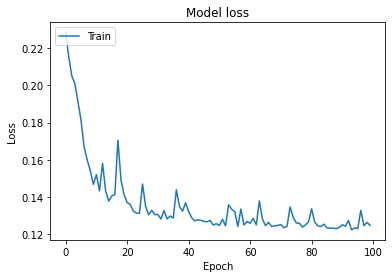

In [150]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [151]:
X_test.head()

,Age,SibSp,Parch,Fare,First Class,Second Class,Third Class,Female,Male,S,C,Q
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [152]:
print(X_test.shape)

(418, 12)


In [153]:
predicted = model.predict(X_test)

In [154]:
predicted.shape

(418, 1)

In [155]:
pid = test['PassengerId']
predicted = np.around(predicted)
predicted[:10]
evaluation=pid.to_frame()
evaluation["Survived"]=predicted
evaluation['Survived'] = evaluation['Survived'].astype(int) 
evaluation.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [156]:
from google.colab import files
evaluation.to_csv('submission.csv', index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>